In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# 读取图像
image = cv.imread(r'minus222.png',cv.IMREAD_GRAYSCALE)#, cv2.IMREAD_GRAYSCALE
print(image.shape)

(3036, 4024)


In [3]:
# 选择要处理的图像行
row_index = int(image.shape[0] / 2)  # 将索引转换为整数
img =image

print(image)

[[8 7 8 ... 2 3 4]
 [7 7 7 ... 4 5 5]
 [7 8 7 ... 4 5 5]
 ...
 [5 7 5 ... 5 5 3]
 [5 7 5 ... 5 4 4]
 [5 7 7 ... 3 2 3]]


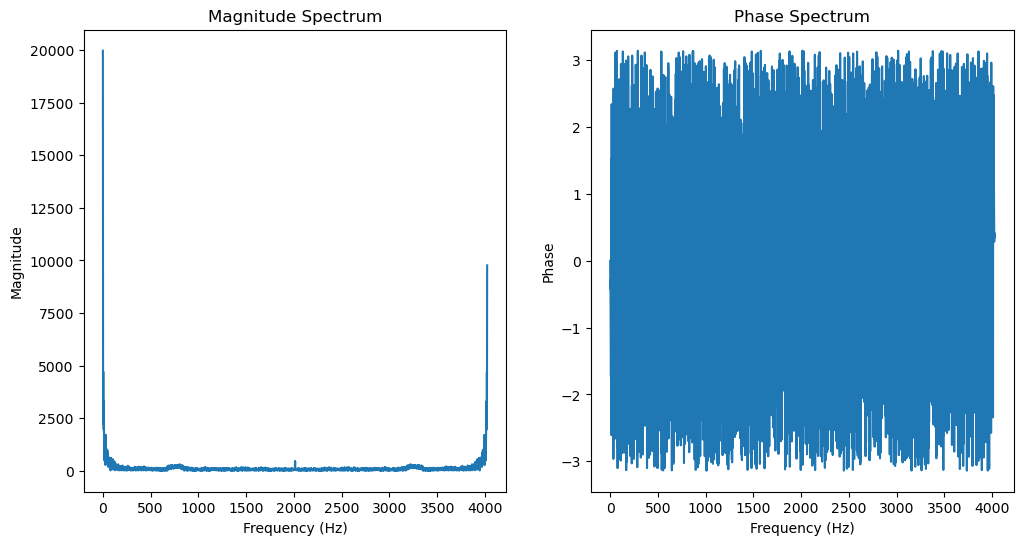

In [4]:
# 选择要处理的图像行
row_index = int(image.shape[0] / 2)  # 将索引转换为整数
# 获取所选行
row = image[row_index, ...]
row_fft = cv2.dft(np.float32(row), flags=cv2.DFT_COMPLEX_OUTPUT)#
#calculate magnitude
row_magnitude = cv2.magnitude(row_fft[:,:, 0], row_fft[:,:, 1])
# 将频率谱移至中心
row_magnitude_shifted = np.fft.fftshift(row_magnitude)
# 提取相位信息
row_phase = np.angle(row_fft[:, 0, 0] +  row_fft[:, 0, 1]* 1j)

#in numpy
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(row_magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum")

plt.subplot(122)
plt.plot(row_phase)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase")
plt.title("Phase Spectrum")
plt.show()

Text(0.5, 1.0, 'Phase Spectrum')

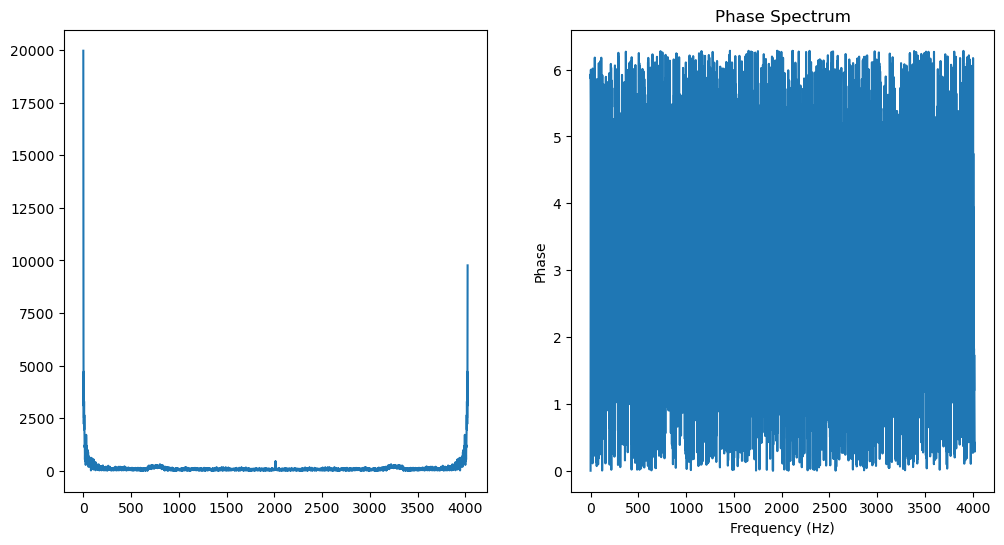

In [5]:
#cv2
row_fft_shifted = cv2.dft(np.float32(row), flags=cv2.DFT_COMPLEX_OUTPUT)
row_magnitude2, row_phase2 = cv2.cartToPolar(row_fft_shifted[:, :, 0], row_fft_shifted[:, :, 1])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(row_magnitude2)

plt.subplot(122)
plt.plot(row_phase2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase")
plt.title("Phase Spectrum")

In [6]:
# 计算实数部分和虚数部分的强度
# real_part = row_fft[:, :, 0]
# imaginary_part = row_fft[:, :, 1]
# magnitude = np.sqrt(real_part**2 + imaginary_part**2)
# plt.figure()
# plt.plot(magnitude)